In [1]:
import commons


# this is a list of features which are used in the Project Security Awareness Score
features = [
    'If an open-source project has a security policy',
    'If an open-source project has a security team'
]

class TestVector(commons.BaseTestVector):
        
    def __init__(self, alias = ''):
        super().__init__(features, alias)

    def has_security_policy(self, value):
        return self.set('If an open-source project has a security policy', value)

    def has_security_team(self, value):
        return self.set('If an open-source project has a security team', value)


test_vector_list = commons.TestVectorList(features)

In [2]:
all_unknown_values = TestVector().score_from(0.0).score_to(0.1)
test_vector_list.register(all_unknown_values)

test_vector_list.register(
    TestVector()
        .has_security_policy(False)
        .has_security_team(False)
        .score_from(0.0)
        .score_to(1.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(False)
        .has_security_team(True)
        .score_from(5.0)
        .score_to(8.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(True)
        .has_security_team(False)
        .score_from(4.0)
        .score_to(6.0)
)

test_vector_list.register(
    TestVector()
        .has_security_policy(True)
        .has_security_team(True)
        .score_from(9.0)
        .score_to(10.0)
)

registered: test_vector_0
registered: test_vector_1
registered: test_vector_2
registered: test_vector_3
registered: test_vector_4


In [3]:
test_vector_list.check()

In [4]:
# define test vectors
test_vectors = test_vector_list.make_data_frame()

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/score/oss/ProjectSecurityAwarenessScoreTestVectors.csv'
test_vectors.to_csv(filename)

# print out the test vectors
test_vectors

,alias,score_from,score_to,label,If an open-source project has a security policy,If an open-source project has a security team
0,test_vector_0,0.0,0.1,None,unknown,unknown
1,test_vector_1,0.0,1.0,None,False,False
2,test_vector_2,5.0,8.0,None,False,True
3,test_vector_3,4.0,6.0,None,True,False
4,test_vector_4,9.0,10.0,None,True,True


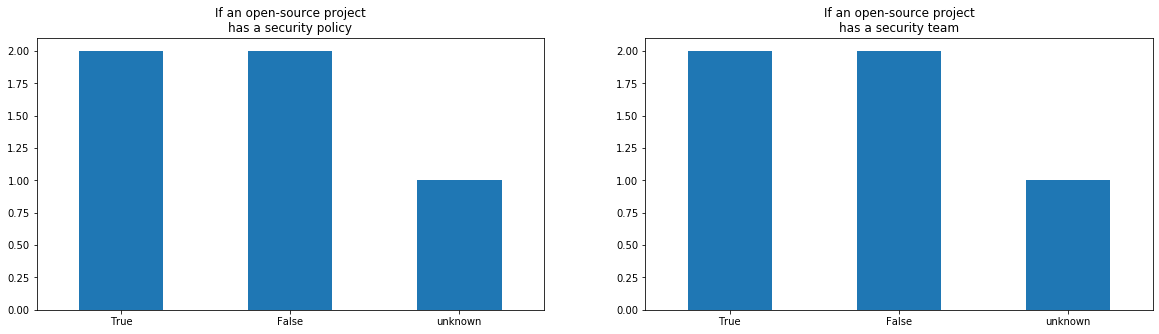

In [5]:
commons.draw_hists(features, test_vectors)